In [1]:
# Import pandas, os, numpy, matplotlib
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the data from the file BBox_List_2017.csv and Data_Entry_2017.csv
bbox_data = pd.read_csv('Resources/BBox_List_2017.csv')
data_entry = pd.read_csv('Resources/Data_Entry_2017.csv')

In [3]:
# Images data path archive/images_001/ to archove/images_012/

image_folders = [f'archive/images_{i:03}/images' for i in range(1, 13)]

# Ceate variable image_path to store the path of the images
image_path = 'archive/' + image_folders[0]


archive/images_001/images/00000001_000.png
archive/images_002/images/00001336_000.png
archive/images_003/images/00003923_014.png
archive/images_004/images/00006585_007.png
archive/images_005/images/00009232_004.png
archive/images_006/images/00011558_008.png
archive/images_007/images/00013774_026.png
archive/images_008/images/00016051_010.png
archive/images_009/images/00018387_035.png
archive/images_010/images/00020945_050.png
archive/images_011/images/00024718_000.png
archive/images_012/images/00028173_003.png


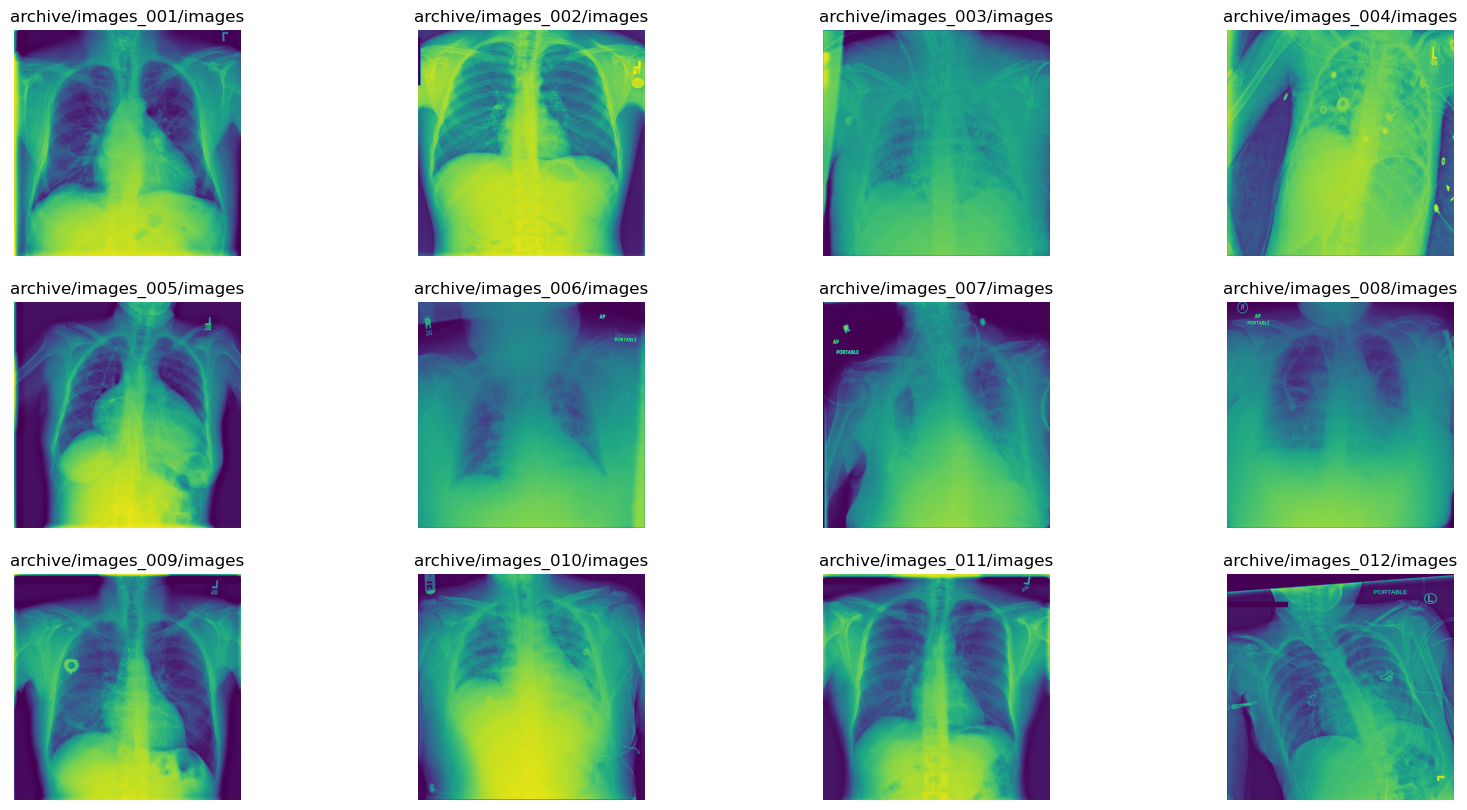

Number of images in each folder:
archive/images_001/images: 4999 images
archive/images_002/images: 10000 images
archive/images_003/images: 10000 images
archive/images_004/images: 10000 images
archive/images_005/images: 10000 images
archive/images_006/images: 10000 images
archive/images_007/images: 10000 images
archive/images_008/images: 10000 images
archive/images_009/images: 10000 images
archive/images_010/images: 10000 images
archive/images_011/images: 10000 images
archive/images_012/images: 7121 images
Images data:
archive/images_001/images: (1024, 1024)
archive/images_002/images: (1024, 1024)
archive/images_003/images: (1024, 1024)
archive/images_004/images: (1024, 1024)
archive/images_005/images: (1024, 1024)
archive/images_006/images: (1024, 1024)
archive/images_007/images: (1024, 1024)
archive/images_008/images: (1024, 1024)
archive/images_009/images: (1024, 1024)
archive/images_010/images: (1024, 1024)
archive/images_011/images: (1024, 1024)
archive/images_012/images: (1024, 10

In [4]:
# Show random image from each folder
for folder in image_folders:
    image = os.listdir(folder)[0]
    print(f'{folder}/{image}')
    
# plot those images
fig, ax = plt.subplots(3, 4, figsize=(20, 10))
ax = ax.ravel()
for i, folder in enumerate(image_folders):
    image = os.listdir(folder)[0]
    img = plt.imread(f'{folder}/{image}')
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(folder)
plt.show()

# Print infos about the thoes images
print('Number of images in each folder:')
for folder in image_folders:
    print(f'{folder}: {len(os.listdir(folder))} images')
    
# Print the images data
print('Images data:')
for folder in image_folders:
    image = os.listdir(folder)[0]
    img = plt.imread(f'{folder}/{image}')
    print(f'{folder}: {img.shape}')


# Print what colourspace the images are in
print('Colourspaces:')
for folder in image_folders:
    image = os.listdir(folder)[0]
    img = plt.imread(f'{folder}/{image}')
    print(f'{folder}: {img.dtype}')
    
        





In [5]:
import os
import random
from PIL import Image

# Define the folders
image_folders = [f'archive/images_{i:03}/images' for i in range(1, 13)]

def get_image_mode(image_path):
    try:
        image = Image.open(image_path)
        return image.mode
    except Exception as e:
        print(f'Error opening {image_path}: {e}')
        return None

image_modes = {}
sample_size = 5  # Number of samples per folder

for folder in image_folders:
    folder = os.path.normpath(folder)
    print(f'Checking folder: {folder}')  # Print folder being checked
    if os.path.exists(folder):
        image_files = [f for f in os.listdir(folder) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
        if len(image_files) > 0:
            sample_files = random.sample(image_files, min(sample_size, len(image_files)))
            for image_file in sample_files:
                image_path = os.path.join(folder, image_file)
                image_path = os.path.normpath(image_path)
                print(f'Checking file: {image_path}')  # Print file being checked
                mode = get_image_mode(image_path)
                if mode:
                    if mode not in image_modes:
                        image_modes[mode] = []
                    image_modes[mode].append(image_path)
                else:
                    print(f'Failed to get mode for {image_path}')
    else:
        print(f'Folder does not exist: {folder}')

# Print out the results
if image_modes:
    for mode, paths in image_modes.items():
        print(f'\nImages with mode {mode}:')
        for path in paths:
            print(f'{path}: {mode}')
else:
    print('No images found or processed.')


Checking folder: archive\images_001\images
Checking file: archive\images_001\images\00000765_000.png
Checking file: archive\images_001\images\00000644_001.png
Checking file: archive\images_001\images\00001255_005.png
Checking file: archive\images_001\images\00001006_008.png
Checking file: archive\images_001\images\00000272_001.png
Checking folder: archive\images_002\images
Checking file: archive\images_002\images\00003393_007.png
Checking file: archive\images_002\images\00002334_001.png
Checking file: archive\images_002\images\00002111_008.png
Checking file: archive\images_002\images\00003430_001.png
Checking file: archive\images_002\images\00003803_013.png
Checking folder: archive\images_003\images
Checking file: archive\images_003\images\00006457_000.png
Checking file: archive\images_003\images\00004108_000.png
Checking file: archive\images_003\images\00005991_007.png
Checking file: archive\images_003\images\00005791_000.png
Checking file: archive\images_003\images\00006304_023.png
C

In [6]:
# show me info of bbox_data
print(bbox_data.info())

# show me info of data_entry
print(data_entry.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Image Index    984 non-null    object 
 1   Finding Label  984 non-null    object 
 2   Bbox [x        984 non-null    float64
 3   y              984 non-null    float64
 4   w              984 non-null    float64
 5   h]             984 non-null    float64
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     0 non-null      float64
 8   Unnamed: 8     0 non-null      float64
dtypes: float64(7), object(2)
memory usage: 69.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112120 entries, 0 to 112119
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112120 non-null  object 
 1   Finding Labels               112120 non-null  object 
 2   Fo

In [7]:
# Show me the first 5 rows of bbox_data
print(bbox_data.head())

        Image Index Finding Label     Bbox [x           y           w  \
0  00013118_008.png   Atelectasis  225.084746  547.019217   86.779661   
1  00014716_007.png   Atelectasis  686.101695  131.543498  185.491525   
2  00029817_009.png   Atelectasis  221.830508  317.053115  155.118644   
3  00014687_001.png   Atelectasis  726.237288  494.951420  141.016949   
4  00017877_001.png   Atelectasis  660.067797  569.780787  200.677966   

           h]  Unnamed: 6  Unnamed: 7  Unnamed: 8  
0   79.186441         NaN         NaN         NaN  
1  313.491525         NaN         NaN         NaN  
2  216.949153         NaN         NaN         NaN  
3   55.322034         NaN         NaN         NaN  
4   78.101695         NaN         NaN         NaN  


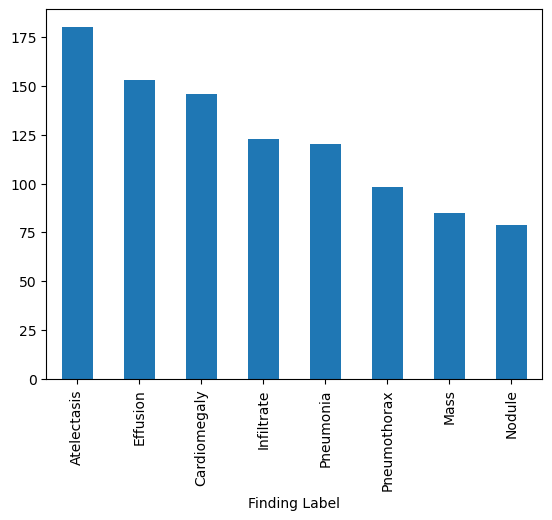

In [8]:
# plot the distribution of  Finding Labels in bbox_data
bbox_data['Finding Label'].value_counts().plot(kind='bar')
plt.show()

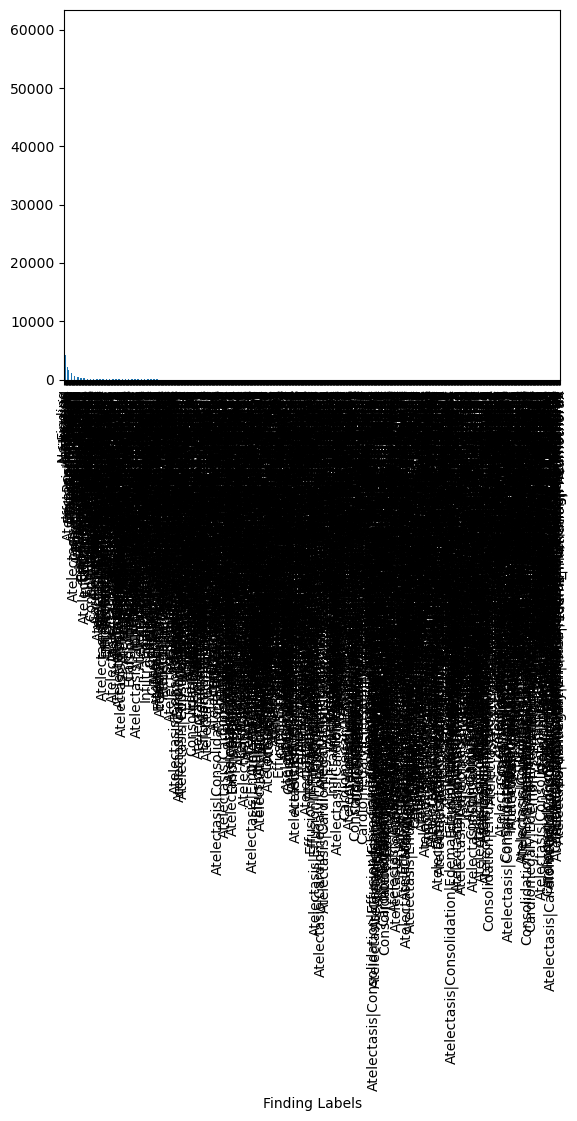

In [9]:
# Show finding labels distribution in data_entry
data_entry['Finding Labels'].value_counts().plot(kind='bar')
plt.show()

In [10]:
# Show data_entry
print(data_entry.head())
print(data_entry.dtypes)

        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_000.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           58              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           81              M            PA                 2500     2048   
4           81              F            PA                 2582     2991   

   OriginalImagePixelSpacing[x     y]  Unnamed: 11  
0                        0.143  0.143          NaN 

#### One-Hot Encoding of Diagnosis Labels
To prepare the 'Finding Labels' for machine learning modeling, I used the `MultiLabelBinarizer` from `sklearn` to convert the list of labels in each row into a one-hot encoded format. This transformation creates a new column for each unique label in the dataset, where each column represents the presence (1) or absence (0) of that specific condition in the x-ray images. This format is necessary for training classification models, as it allows the model to learn to predict the presence of each condition independently.


In [11]:
# convert the list of labels in each row into a one-hot encoded format using `MultiLabelBinarizer` from `sklearn`
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
data_entry['Finding Labels'] = data_entry['Finding Labels'].apply(lambda x: x.split('|'))
data_entry = data_entry.join(pd.DataFrame(mlb.fit_transform(data_entry.pop('Finding Labels')),
                                          columns=mlb.classes_,
                                          index=data_entry.index))

# Show the first 5 rows of data_entry
print(data_entry.head())




        Image Index  Follow-up #  Patient ID  Patient Age Patient Gender  \
0  00000001_000.png            0           1           58              M   
1  00000001_001.png            1           1           58              M   
2  00000001_002.png            2           1           58              M   
3  00000002_000.png            0           2           81              M   
4  00000003_000.png            0           3           81              F   

  View Position  OriginalImage[Width  Height]  OriginalImagePixelSpacing[x  \
0            PA                 2682     2749                        0.143   
1            PA                 2894     2729                        0.143   
2            PA                 2500     2048                        0.168   
3            PA                 2500     2048                        0.171   
4            PA                 2582     2991                        0.143   

      y]  ...  Emphysema  Fibrosis  Hernia  Infiltration  Mass  No Finding

[ 58  81  74  75  76  77  78  79  80  82  69  70  73  84  61  60  62  56
  57  71  66  53  47  48  49  63  64  52  68  59  55  72  67  46  91  92
  87  65  45  54  50  51  44  83  33  42  25  31  94  89  90  40  85  30
  32  34  86  37  27  29  36  38  39  43  28  41  35  22  23  26  21  88
  24  17  18  19  20  16  13  14  11  12  15  93   9  10   8   6   7   4
   5   3   2 412   1 414 148  95 150 149 152 151 411 413 153 154 155]


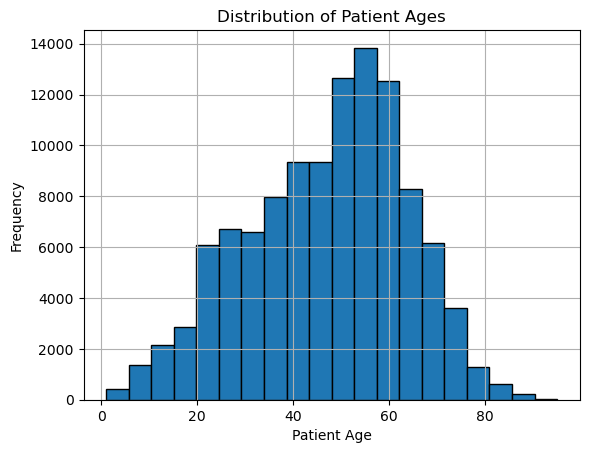

In [12]:
# Show unique values for Patient Age in data_entry
unique_ages = data_entry['Patient Age'].unique()
print(unique_ages)

# Show the distribution of Patient Age in data_entry
filtered_ages = data_entry['Patient Age'][(data_entry['Patient Age'] >= 0) & (data_entry['Patient Age'] <= 100)]
plt.hist(filtered_ages, bins=20, edgecolor='black')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Ages')
plt.grid(True)
plt.show()


Unique ages after filtering:
[58 81 74 75 76 77 78 79 80 82 69 70 73 84 61 60 62 56 57 71 66 53 47 48
 49 63 64 52 68 59 55 72 67 46 91 92 87 65 45 54 50 51 44 83 33 42 25 31
 94 89 90 40 85 30 32 34 86 37 27 29 36 38 39 43 28 41 35 22 23 26 21 88
 24 17 18 19 20 16 13 14 11 12 15 93  9 10  8  6  7  4  5  3  2  1 95]


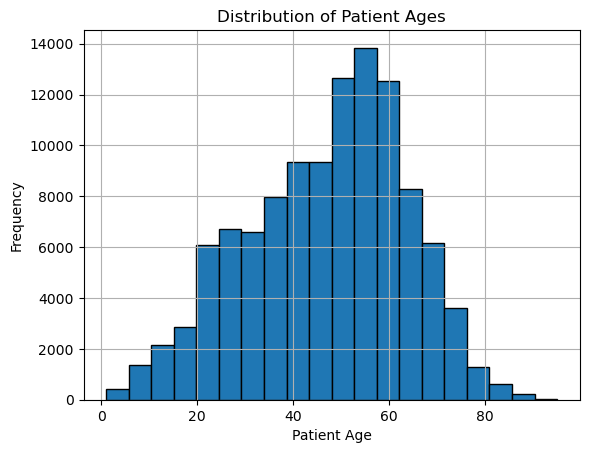

In [13]:
# Find the median age
median_age = data_entry['Patient Age'].median()

# Replace all values greater than 95 with the median age
data_entry['Patient Age'] = data_entry['Patient Age'].apply(lambda x: median_age if x > 95 else x)

# Convert all values to integers
data_entry['Patient Age'] = data_entry['Patient Age'].astype(int)

# Display unique patient ages after filtering
print("\nUnique ages after filtering:")
unique_ages = data_entry['Patient Age'].unique()
print(unique_ages)

# Display the distribution of patient ages after filtering
filtered_ages = data_entry['Patient Age'][(data_entry['Patient Age'] >= 0) & (data_entry['Patient Age'] <= 100)]
plt.hist(filtered_ages, bins=20, edgecolor='black')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.title('Distribution of Patient Ages')
plt.grid(True)
plt.show()

In [14]:
# One-hot encode the 'Patient Gender' and 'View Position' columns
data_entry = pd.get_dummies(data_entry, columns=['Patient Gender', 'View Position'])

# Convert boolean columns to int
bool_columns = data_entry.select_dtypes(include=['bool']).columns
data_entry[bool_columns] = data_entry[bool_columns].astype(int)

# Show the first 5 rows of the updated data_entry DataFrame
print(data_entry.head())

# Show the column names and data types to verify the conversion
print(data_entry.dtypes)


        Image Index  Follow-up #  Patient ID  Patient Age  \
0  00000001_000.png            0           1           58   
1  00000001_001.png            1           1           58   
2  00000001_002.png            2           1           58   
3  00000002_000.png            0           2           81   
4  00000003_000.png            0           3           81   

   OriginalImage[Width  Height]  OriginalImagePixelSpacing[x     y]  \
0                 2682     2749                        0.143  0.143   
1                 2894     2729                        0.143  0.143   
2                 2500     2048                        0.168  0.168   
3                 2500     2048                        0.171  0.171   
4                 2582     2991                        0.143  0.143   

   Unnamed: 11  Atelectasis  ...  Mass  No Finding  Nodule  \
0          NaN            0  ...     0           0       0   
1          NaN            0  ...     0           0       0   
2          NaN      

In [15]:
# Drop column Unnamed: 11
data_entry = data_entry.drop(columns=['Unnamed: 11'])


In [16]:
# drop Unnamed: 7, Unnamed: 8 and Unnamed: 6 columns from bbox_data
bbox_data = bbox_data.drop(columns=['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 6'])


In [17]:
# convert the list of labels in each row into a one-hot encoded format using `MultiLabelBinarizer` from `sklearn` in bbox_data
mlb = MultiLabelBinarizer()

bbox_data['Finding Label'] = bbox_data['Finding Label'].apply(lambda x: x.split('|'))
bbox_data = bbox_data.join(pd.DataFrame(mlb.fit_transform(bbox_data.pop('Finding Label')),
                                          columns=mlb.classes_,
                                          index=bbox_data.index))

# Show the first 5 rows of the updated bbox_data DataFrame
print(bbox_data.head())

        Image Index     Bbox [x           y           w          h]  \
0  00013118_008.png  225.084746  547.019217   86.779661   79.186441   
1  00014716_007.png  686.101695  131.543498  185.491525  313.491525   
2  00029817_009.png  221.830508  317.053115  155.118644  216.949153   
3  00014687_001.png  726.237288  494.951420  141.016949   55.322034   
4  00017877_001.png  660.067797  569.780787  200.677966   78.101695   

   Atelectasis  Cardiomegaly  Effusion  Infiltrate  Mass  Nodule  Pneumonia  \
0            1             0         0           0     0       0          0   
1            1             0         0           0     0       0          0   
2            1             0         0           0     0       0          0   
3            1             0         0           0     0       0          0   
4            1             0         0           0     0       0          0   

   Pneumothorax  
0             0  
1             0  
2             0  
3             0  
4       

In [18]:
# print all columns from both datasets
print('Columns in bbox_data:')
print(bbox_data.columns)

print('\nColumns in data_entry:')
print(data_entry.columns)

Columns in bbox_data:
Index(['Image Index', 'Bbox [x', 'y', 'w', 'h]', 'Atelectasis', 'Cardiomegaly',
       'Effusion', 'Infiltrate', 'Mass', 'Nodule', 'Pneumonia',
       'Pneumothorax'],
      dtype='object')

Columns in data_entry:
Index(['Image Index', 'Follow-up #', 'Patient ID', 'Patient Age',
       'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]',
       'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding',
       'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax',
       'Patient Gender_F', 'Patient Gender_M', 'View Position_AP',
       'View Position_PA'],
      dtype='object')


In [19]:
# Print dtypes, info and head for both datasets
print('Data types in bbox_data:')
print(bbox_data.dtypes)
print('\nInfo for bbox_data:')
print(bbox_data.info())
print('\nHead for bbox_data:')
print(bbox_data.head())

    
print('\nData types in data_entry:')
print(data_entry.dtypes)
print('\nInfo for data_entry:')
print(data_entry.info())
print('\nHead for data_entry:')
print(data_entry.head())

Data types in bbox_data:
Image Index      object
Bbox [x         float64
y               float64
w               float64
h]              float64
Atelectasis       int32
Cardiomegaly      int32
Effusion          int32
Infiltrate        int32
Mass              int32
Nodule            int32
Pneumonia         int32
Pneumothorax      int32
dtype: object

Info for bbox_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Image Index   984 non-null    object 
 1   Bbox [x       984 non-null    float64
 2   y             984 non-null    float64
 3   w             984 non-null    float64
 4   h]            984 non-null    float64
 5   Atelectasis   984 non-null    int32  
 6   Cardiomegaly  984 non-null    int32  
 7   Effusion      984 non-null    int32  
 8   Infiltrate    984 non-null    int32  
 9   Mass          984 non-null    int32  
 10  No

In [20]:
print(data_entry.isnull().sum())
print(bbox_data.isnull().sum())


Image Index                    0
Follow-up #                    0
Patient ID                     0
Patient Age                    0
OriginalImage[Width            0
Height]                        0
OriginalImagePixelSpacing[x    0
y]                             0
Atelectasis                    0
Cardiomegaly                   0
Consolidation                  0
Edema                          0
Effusion                       0
Emphysema                      0
Fibrosis                       0
Hernia                         0
Infiltration                   0
Mass                           0
No Finding                     0
Nodule                         0
Pleural_Thickening             0
Pneumonia                      0
Pneumothorax                   0
Patient Gender_F               0
Patient Gender_M               0
View Position_AP               0
View Position_PA               0
dtype: int64
Image Index     0
Bbox [x         0
y               0
w               0
h]              0
Atelec

In [21]:
# # Save cleaned data to CSV
# data_entry.to_csv('Resources/cleaned_data_entry.csv', index=False)
# bbox_data.to_csv('Resources/cleaned_bbox_data.csv', index=False)


Columns in bbox_data:
Index(['Image Index', 'Bbox [x', 'y', 'w', 'h]', 'Atelectasis', 'Cardiomegaly',
       'Effusion', 'Infiltrate', 'Mass', 'Nodule', 'Pneumonia',
       'Pneumothorax'],
      dtype='object')

Columns in data_entry:
Index(['Image Index', 'Follow-up #', 'Patient ID', 'Patient Age',
       'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]',
       'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion',
       'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding',
       'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax',
       'Patient Gender_F', 'Patient Gender_M', 'View Position_AP',
       'View Position_PA'],
      dtype='object')


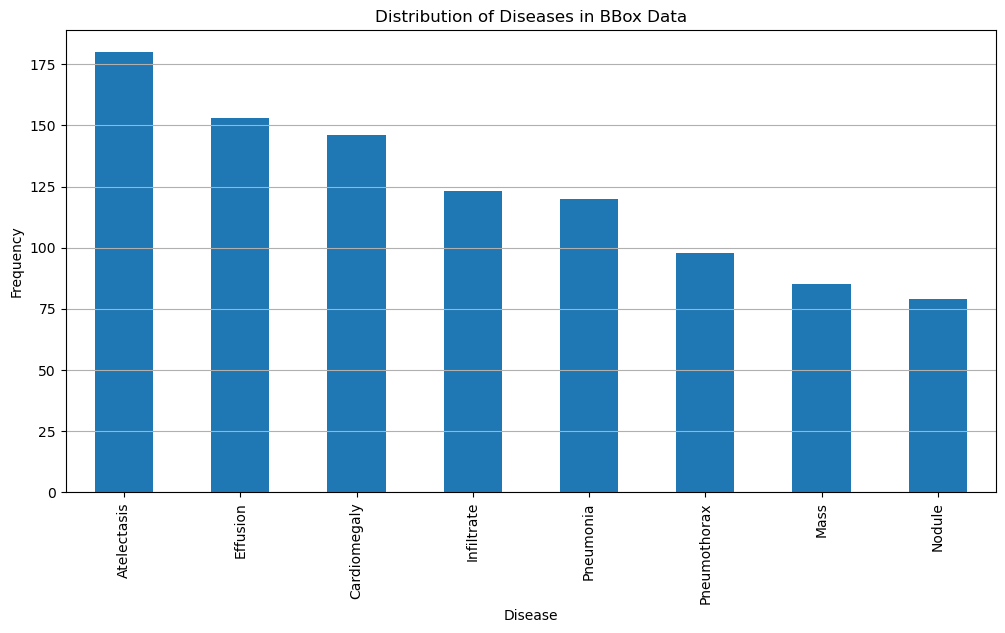

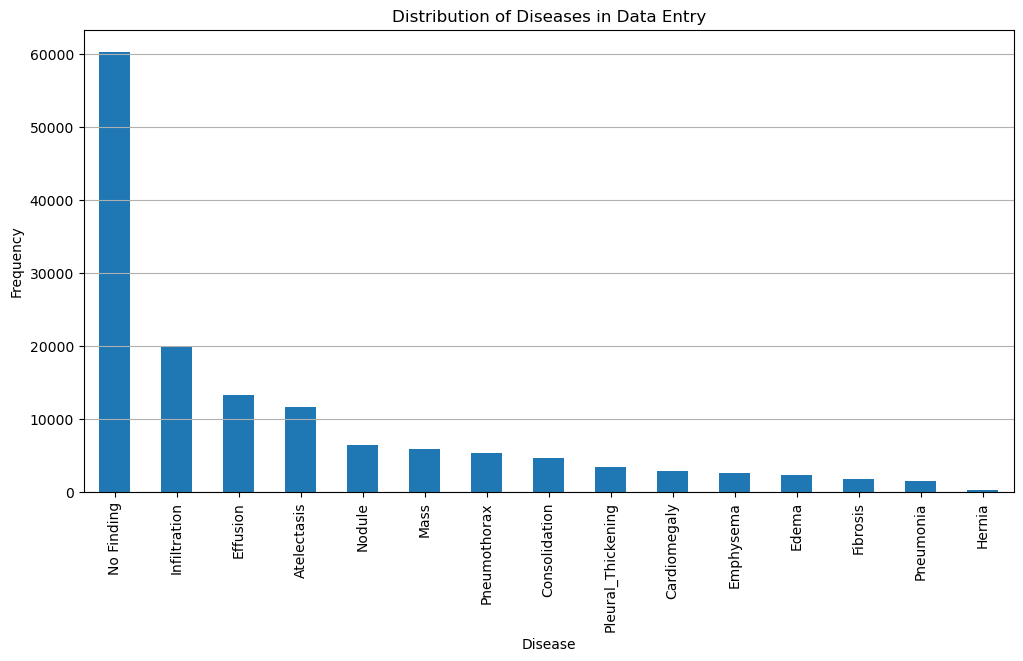

In [22]:
# Prikaz informacija o kolonama
print('Columns in bbox_data:')
print(bbox_data.columns)

print('\nColumns in data_entry:')
print(data_entry.columns)

# Definiši kolone koje predstavljaju detektovane bolesti
disease_columns_bbox = ['Atelectasis', 'Cardiomegaly', 'Effusion', 'Infiltrate', 'Mass', 'Nodule', 'Pneumonia', 'Pneumothorax']
disease_columns_data_entry = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']

# Funkcija za plotovanje distribucije
def plot_disease_distribution(df, disease_columns, title):
    df[disease_columns].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
    plt.title(title)
    plt.xlabel('Disease')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

# Prikaz distribucije za bolesti u bbox_data
plot_disease_distribution(bbox_data, disease_columns_bbox, 'Distribution of Diseases in BBox Data')

# Prikaz distribucije za bolesti u data_entry
plot_disease_distribution(data_entry, disease_columns_data_entry, 'Distribution of Diseases in Data Entry')
